# Recommender systems via the SVD

This is a simple example of how the SVD comes up in "recommender systems" or ["collaborative filters"](https://en.wikipedia.org/wiki/Collaborative_filtering) such as the "Netflix problem" of determining how best to recommend movies to users, so called because of the [Netflix prize](https://en.wikipedia.org/wiki/Netflix_Prize).  

This notebook is just scratching the surface. The class [AMath 582](http://www.washington.edu/students/crscat/appmath.html#amath582), for example, covers some applications of the SVD in more detail. 

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Define a matrix in which rows correspond to movies, columns to users and assume ratings are $-2, -1$ (dislike) or $1, 2$ (like) with 0 indicating missing data.  For example:

In [2]:
A = array([[2,-2,1,0,-1],
           [2,-1,0,-2,0],
           [0,2,-1,0,0],
           [-1,2,0,1,2]])
print A

[[ 2 -2  1  0 -1]
 [ 2 -1  0 -2  0]
 [ 0  2 -1  0  0]
 [-1  2  0  1  2]]


Compute the SVD of $A = U\Sigma V^*$:

In [3]:
(U,S,Vstar) = svd(A)

If we make the simple assumption that there is variation in movies along a single axis and that people tend to either like or dislike movies depending on their location along this axis, then we are assuming $A$ is a rank 1 matrix.   So compute $A_1$, the best rank-1 approximation to $A$:

In [4]:
A1 = dot(U[:,0:1], S[0]*Vstar[0:1,:])
print A1

[[ 1.597827   -2.0246221   0.53133767 -0.8986858  -1.03304241]
 [ 1.27286102 -1.61285456  0.42327424 -0.71591113 -0.82294229]
 [-0.83082599  1.05274769 -0.27628094  0.46729184  0.53715358]
 [-1.56201597  1.9792456  -0.51942916  0.87854416  1.00988952]]


This has filled in the elements in such a way that the sign of each element gives some indication of whether a given user will like a given movie.

This matrix is $A_1 = \sigma_1 u_1 v_1^*$ and the first left singular vector $u_1$ tells us something about the movies under this rank-1 assumption: elements of $u_1$ with the same sign correspond to similar movies that are either liked or disliked as a group by each user:

In [5]:
U[:,0:1]

array([[-0.59124496],
       [-0.47099759],
       [ 0.30743108],
       [ 0.57799378]])

The right singular vector $v_1$ tells us something about users.  Elements with the same sign correspond to users with similar taste, while elements with opposite sign correspond to users with opposite taste:

In [6]:
Vstar[0:1,:].T

array([[-0.53834364],
       [ 0.68214046],
       [-0.17901954],
       [ 0.30278734],
       [ 0.34805509]])

### Colorful representation of these matrices:

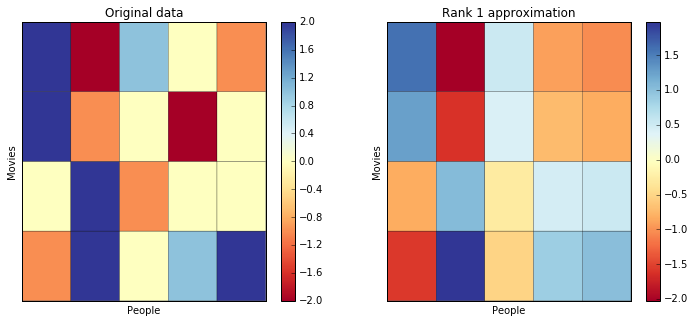

In [7]:
figure(figsize=(12,5))
subplot(1,2,1)
pcolor(flipud(array(A)), cmap=cm.RdYlBu, edgecolors='k')
xlabel('People')
ylabel('Movies')
xticks([])
yticks([])
title('Original data')
colorbar()

subplot(1,2,2)
pcolor(flipud(array(A1)), cmap=cm.RdYlBu, edgecolors='k')
xlabel('People')
ylabel('Movies')
xticks([])
yticks([])
title('Rank 1 approximation')
colorbar()

For this simple example a rank 1 matrix does a pretty good job -- the yellow squares on the left (missing values) have been filled in with colors hinting at whether each user will like a movie (bluish) or not (redish).  

For more complicated data with many differnt genres of movies there might be more factors that come into peoples' tastes and the full matrix (if everyone rated every movie) would not be well approximated by a rank 1 matrix, but might be expected to be approximated by a low rank matrix that explains the "principle components" of peoples' tastes.  The SVD is closely related to [principle component analysis](https://en.wikipedia.org/wiki/Principal_component_analysis) (PCA).

## Matrix completion

A better way to solve the recommender problem is to view it as a problem of "matrix completion".  Given a matrix $A$ that has some known elements and some missing elements, we want to fill in all the missing elements to obtain a matrix $M$ that can be used to recommend a movie.  The matrix completion problem is to fill in the missing values in such a way that the matrix $M$ has minimal rank.  This is a much harder optimization problem with no simple algorithm.  See for example the [wikipedia page on Matrix completion](https://en.wikipedia.org/wiki/Matrix_completion).